In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import jax.numpy as np
from jax import device_get, random
from jax.config import config; config.update('jax_platform_name', 'cpu')
from jax.scipy.special import logsumexp

from numpyro.mcmc import mcmc

### potential energy

In [2]:
def dual_moon_pe(x):
    # Ref: https://arxiv.org/abs/1505.05770
    term1 = 0.5 * ((np.linalg.norm(x, axis=-1) - 2) / 0.4) ** 2
    term2 = -0.5 * ((x[..., :1] + np.array([-2., 2.])) / 0.6) ** 2
    return term1 - logsumexp(term2, axis=-1)

### run inference

In [3]:
init_params = random.uniform(random.PRNGKey(1), (4, 2), minval=-2., maxval=2.)
samples = mcmc(num_warmup=5000, num_samples=5000, init_params=init_params, num_chains=4,
               potential_fn=dual_moon_pe)
samples = device_get(samples)



                           mean         sd       5.5%      94.5%      n_eff       Rhat
          Param:0[0]      -0.12       1.82      -2.32       2.24      67.18       1.03
          Param:0[1]       0.04       1.18      -1.81       1.83    3041.13       1.00


### plot against ground truth

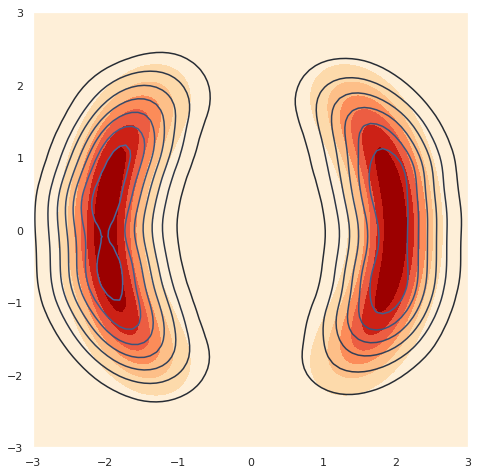

In [4]:
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
P = np.exp(-dual_moon_pe(np.stack([X1, X2], axis=-1)))

plt.figure(figsize=(8, 8))
plt.contourf(X1, X2, P, cmap='OrRd')
sns.kdeplot(samples[:, 0], samples[:, 1])
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.gca().set_aspect('equal');

### problems

+ Can FlowHMC help increase `n_eff` of `Param:0[0]`?